# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

Shape: (28221, 10)

Columns:
 ['ID', 'OPEID', 'Institution Name', 'City', 'State', 'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type', 'Country of Giftor', 'Giftor Name']

Head:
    ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476   

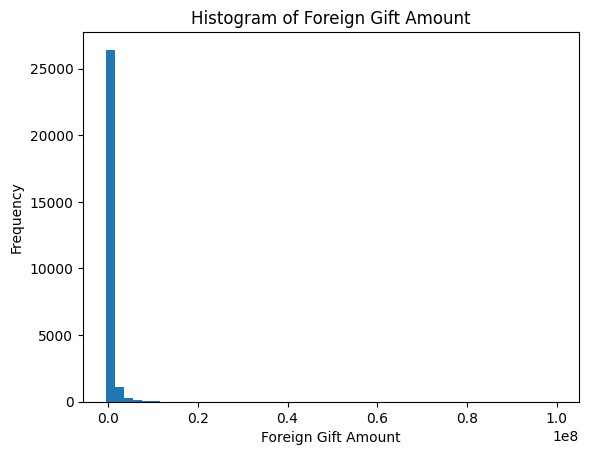


Foreign Gift Amount summary (levels):
count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
50%      9.461500e+04
90%      9.839540e+05
95%      1.875000e+06
99%      7.568696e+06
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

Gift Type counts:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Gift Type proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


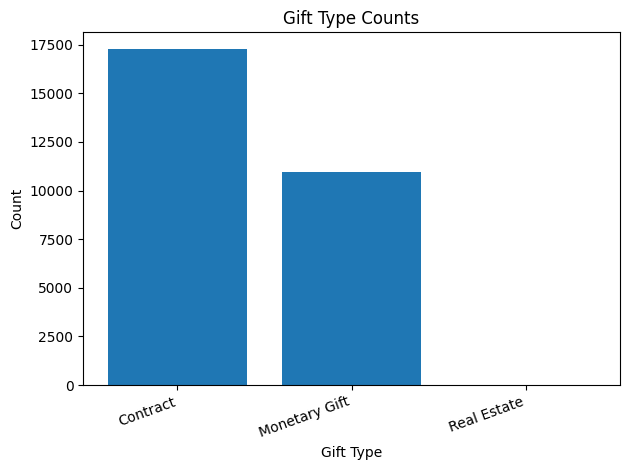

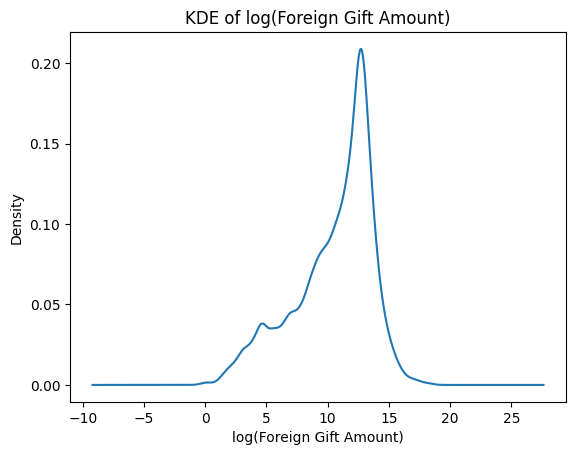

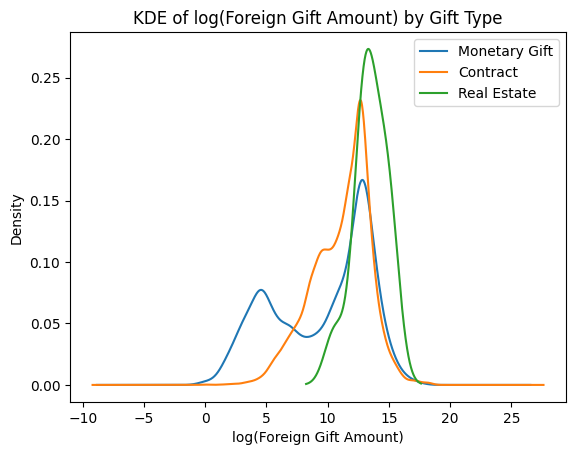


Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64

Top 15 countries by total amount given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA             

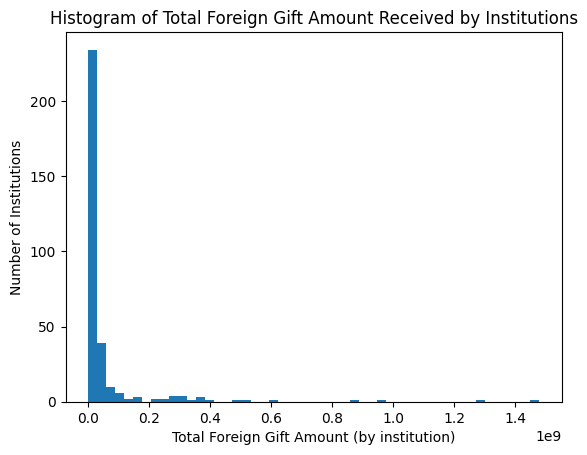


Institution total amount summary:
count    3.180000e+02
mean     5.220288e+07
std      1.535716e+08
min      5.000000e+02
50%      6.486792e+06
90%      9.458091e+07
95%      2.957329e+08
99%      8.173145e+08
max      1.477923e+09
Name: Foreign Gift Amount, dtype: float64

Top 15 giftors by total amount:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University               

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = "/ForeignGifts_edu.csv"


df = pd.read_csv(DATA_PATH)

# Standardize column names (strip whitespace)
df.columns = [c.strip() for c in df.columns]

print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nHead:\n", df.head())


df["Foreign Gift Amount"] = pd.to_numeric(df["Foreign Gift Amount"], errors="coerce")


print("\nMissing Foreign Gift Amount:", df["Foreign Gift Amount"].isna().sum())

plt.figure()
plt.hist(df["Foreign Gift Amount"].dropna(), bins=50)
plt.title("Histogram of Foreign Gift Amount")
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.show()


print("\nForeign Gift Amount summary (levels):")
print(df["Foreign Gift Amount"].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))


gift_type_counts = df["Gift Type"].value_counts(dropna=False)
gift_type_props = gift_type_counts / gift_type_counts.sum()

print("\nGift Type counts:")
print(gift_type_counts)

print("\nGift Type proportions:")
print(gift_type_props)


plt.figure()
plt.bar(gift_type_counts.index.astype(str), gift_type_counts.values)
plt.title("Gift Type Counts")
plt.xlabel("Gift Type")
plt.ylabel("Count")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()


df_pos = df[df["Foreign Gift Amount"].notna() & (df["Foreign Gift Amount"] > 0)].copy()
df_pos["log_amount"] = np.log(df_pos["Foreign Gift Amount"])


plt.figure()
df_pos["log_amount"].plot(kind="kde")
plt.title("KDE of log(Foreign Gift Amount)")
plt.xlabel("log(Foreign Gift Amount)")
plt.ylabel("Density")
plt.show()


plt.figure()
for gtype in df_pos["Gift Type"].dropna().unique():
    df_pos.loc[df_pos["Gift Type"] == gtype, "log_amount"].plot(kind="kde", label=str(gtype))

plt.title("KDE of log(Foreign Gift Amount) by Gift Type")
plt.xlabel("log(Foreign Gift Amount)")
plt.ylabel("Density")
plt.legend()
plt.show()

country_count = (
    df.groupby("Country of Giftor")
      .size()
      .sort_values(ascending=False)
)

country_sum = (
    df.groupby("Country of Giftor")["Foreign Gift Amount"]
      .sum(min_count=1)  # keeps NaN if all missing in group
      .sort_values(ascending=False)
)

print("\nTop 15 countries by number of gifts:")
print(country_count.head(15))

print("\nTop 15 countries by total amount given:")
print(country_sum.head(15))


inst_sum = (
    df.groupby("Institution Name")["Foreign Gift Amount"]
      .sum(min_count=1)
      .sort_values(ascending=False)
)

print("\nTop 15 institutions by total amount received:")
print(inst_sum.head(15))


plt.figure()
plt.hist(inst_sum.dropna(), bins=50)
plt.title("Histogram of Total Foreign Gift Amount Received by Institutions")
plt.xlabel("Total Foreign Gift Amount (by institution)")
plt.ylabel("Number of Institutions")
plt.show()


giftor_sum = (
    df.groupby("Giftor Name")["Foreign Gift Amount"]
      .sum(min_count=1)
      .sort_values(ascending=False)
)

print("\nTop 15 giftors by total amount:")
print(giftor_sum.head(15))


**Foreign Gift Amount (Histogram)**

The distribution of foreign gift amounts is extremely right-skewed.

Most gifts are relatively small, while a small number of gifts are very large, reaching into the hundreds of millions.

Because of this heavy skew and presence of extreme outliers, the mean is not representative of a typical gift.

This motivates analyzing gift amounts on the log scale.

**Gift Type Distribution**

Contracts account for the majority of gifts (≈ 61%).

Monetary gifts make up a substantial minority (≈ 39%).

Real estate gifts are extremely rare (well under 1%).

This suggests that foreign funding to U.S. universities is primarily contractual rather than philanthropic.

**KDE of log(Foreign Gift Amount)**

After log transformation, the distribution becomes much more symmetric and unimodal.

This indicates that gift sizes vary over orders of magnitude and that the log scale better captures the underlying structure.

**KDE of log(Foreign Gift Amount) by Gift Type**

Contracts tend to be larger and more tightly clustered in size.

Monetary gifts exhibit greater variability, including both small and very large gifts.

Real estate gifts appear at high values but are too few to draw strong conclusions.

Gift size distributions differ meaningfully by gift type.

**Top 15 Countries by Number of Gifts**

Countries such as England, China, Canada, Japan, and Switzerland appear most frequently.

These countries provide many individual gifts, though not necessarily the largest total amounts.

**Top 15 Countries by Total Amount Given**

Qatar is the largest contributor by total dollar amount, despite fewer gifts.

Other major contributors include England, China, Saudi Arabia, Canada, and Hong Kong.

This highlights a distinction between countries that give often and those that give large amounts.

**Top 15 Institutions by Total Amount Received**

A small number of elite research universities receive the majority of foreign funding.

Top recipients include Carnegie Mellon, Cornell, Harvard, MIT, and Yale.

Foreign gift funding is highly concentrated across institutions.

Histogram of Total Amount Received by Institutions

The distribution is heavily right-skewed.

Most institutions receive relatively little foreign funding.

A small number of institutions receive very large cumulative amounts, dominating the distribution.

**Giftors Providing the Most Money**

The largest contributors are primarily foreign foundations, government-linked organizations, and large institutional giftors.

Entities such as the Qatar Foundation and Saudi-affiliated organizations account for a substantial share of total funding.

Foreign university funding is driven by a small number of high-value repeat giftors.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

(30478, 13)
30478
['Host Id', 'Host Since', 'Name', 'Neighbourhood', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,0.578149,0.396576,0.025275
Bed & Breakfast,0.072222,0.861111,0.066667
Boat,0.875000,0.125000,0.000000
Bungalow,1.000000,0.000000,0.000000
Cabin,0.500000,0.500000,0.000000
Camper/RV,0.857143,0.142857,0.000000
Castle,0.000000,1.000000,0.000000
Chalet,0.000000,1.000000,0.000000
Condominium,0.765957,0.234043,0.000000


Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Bed & Breakfast,13,155,12
Castle,0,1,0
Chalet,0,1,0
Dorm,4,16,11
House,752,1258,80
Hut,0,2,0
Other,14,29,4
Tent,0,4,0
Treehouse,0,1,3


count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
50%        125.000000
90%        270.000000
95%        350.000000
99%        600.000000
max        999.000000
Name: Price, dtype: float64


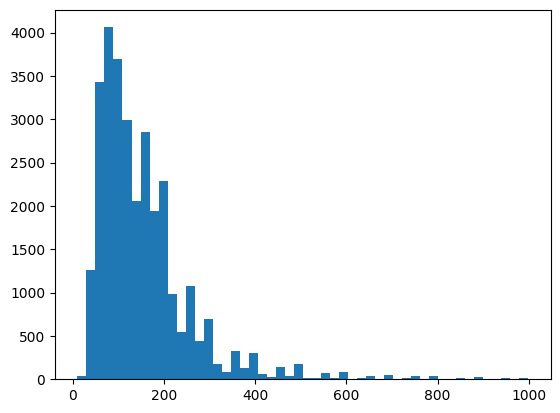

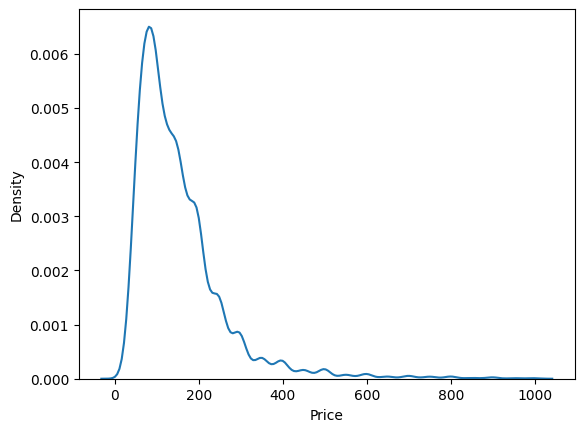

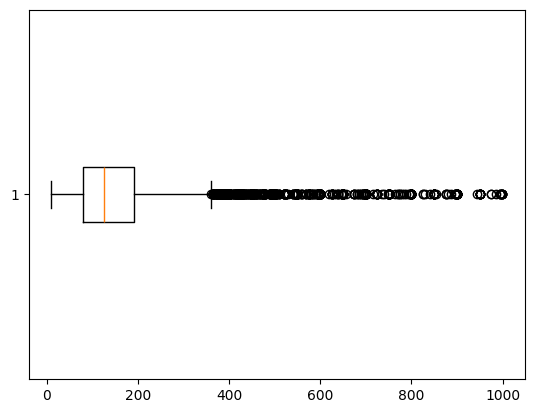

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
50%          4.828314
90%          5.598422
95%          5.857933
99%          6.396930
max          6.906755
Name: price_log, dtype: float64


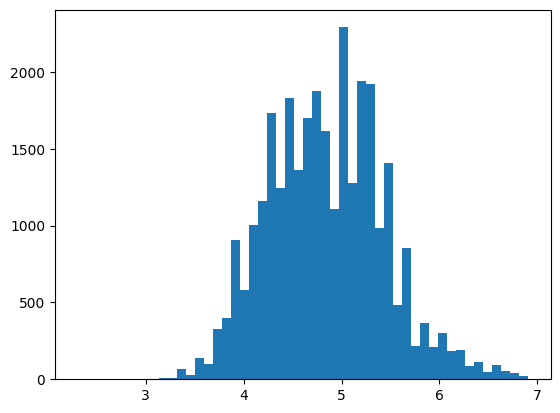

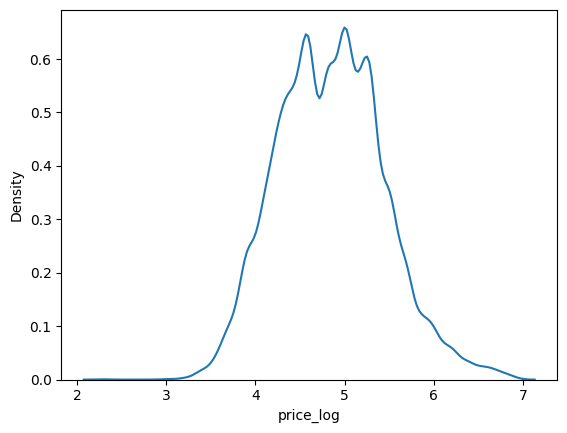

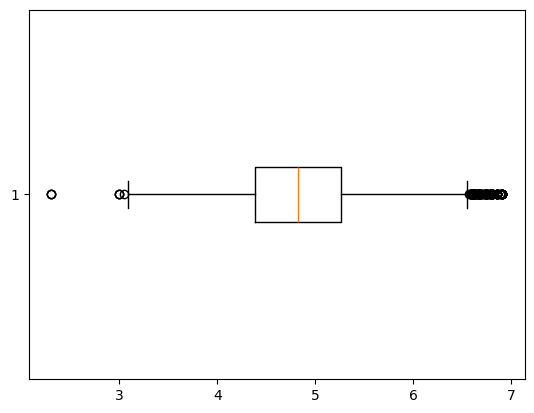

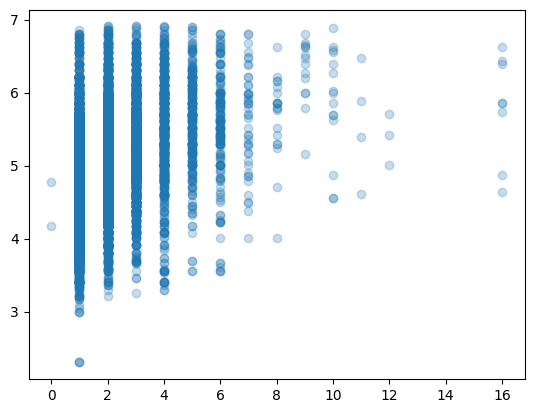

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


,count,mean,std,median
Beds,,,,
0.0,2,92.000000,38.183766,92.0
1.0,20307,124.757670,75.685752,100.0
2.0,6561,186.702332,115.044205,160.0
3.0,2029,234.928043,142.288189,200.0
4.0,766,280.554830,175.512312,240.0
5.0,274,322.000000,190.319415,285.0
6.0,166,316.313253,201.157585,271.0
7.0,45,341.377778,220.116631,300.0
8.0,20,331.850000,155.652202,339.5


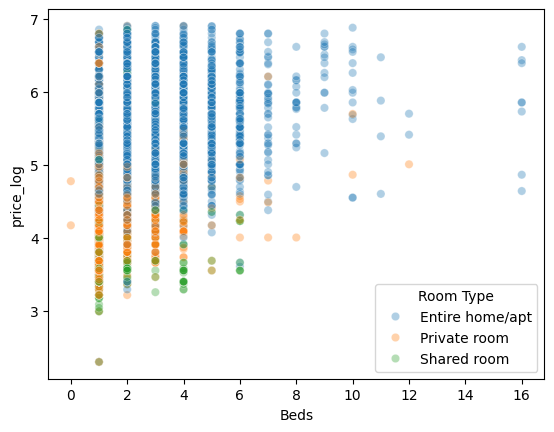

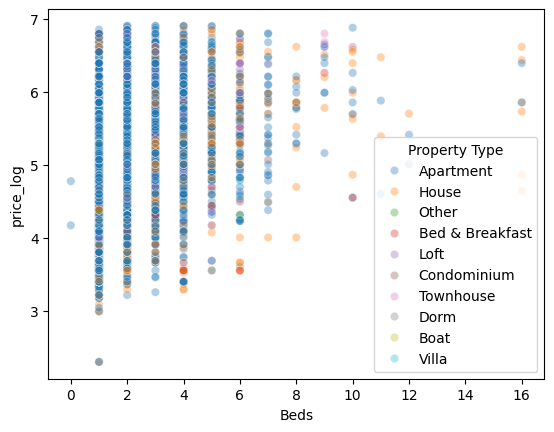

count        mean         std  median
Room Type       Property Type                                         
Entire home/apt Other               10  290.800000  273.526273   177.5
                Loft               379  284.910290  184.515517   220.0
                Condominium         71  281.126761  175.313998   200.0
                Cabin                1  250.000000         NaN   250.0
                Townhouse           81  242.037037  166.755243   189.0
                House              723  234.554633  159.785974   188.0
                Villa                3  206.333333   89.667906   200.0
                Apartment        15550  200.210161  109.967435   175.0
                Bed & Breakfast     13  184.538462  119.814172   130.0
Private room    Other               28  176.642857  141.484252   114.0
Shared room     Treehouse            3  167.666667  114.788211   108.0
Entire home/apt Boat                 7  158.428571   51.110524   150.0
                Bungalow             4  150.750000   46.464144   160.5
Private room    Castle               1  150.000000         NaN   150.0
Shared room     Other                4  148.750000  134.806961    87.5
                Bed & Breakfast     12  143.666667  245.328104    65.0
Private room    Tent                 4  126.250000   94.989034   107.5
                Villa                4  126.250000   71.107313   125.0
                Boat                 1  120.000000         NaN   120.0
Entire home/apt Camper/RV            6  114.333333  107.685963    74.0
Private room    Loft               310   99.077419   63.875489    85.0
                Chalet               1   99.000000         NaN    99.0
                Condominium         22   98.590909   40.576394    90.0
                Bed & Breakfast    155   97.161290   47.031971    85.0
                Treehouse            1   95.000000         NaN    95.0
Shared room     Townhouse            1   95.000000         NaN    95.0
Private room    Apartment        10741   91.605903   46.356168    82.0
                Dorm                16   86.562500   40.738137    70.0
                Townhouse           52   83.365385   30.578109    80.0
                Cabin                1   80.000000         NaN    80.0

count        mean         std  median
Room Type       Property Type                                         
Entire home/apt Loft               379  284.910290  184.515517   220.0
                Condominium         71  281.126761  175.313998   200.0
                Townhouse           81  242.037037  166.755243   189.0
                House              723  234.554633  159.785974   188.0
                Apartment        15550  200.210161  109.967435   175.0
Private room    Loft               310   99.077419   63.875489    85.0
                Bed & Breakfast    155   97.161290   47.031971    85.0
                Apartment        10741   91.605903   46.356168    82.0
                Townhouse           52   83.365385   30.578109    80.0
Shared room     Loft                49   78.816327   87.521824    50.0
                Apartment          684   77.853801   57.875888    66.0
Private room    House             1258   77.750397   49.402650    69.0
Shared room     House               79   46.822785   25.152743    45.0

count        mean         std  median
Room Type       Property Type                                         
Entire home/apt Loft               379  284.910290  184.515517   220.0
                Condominium         71  281.126761  175.313998   200.0
                Townhouse           81  242.037037  166.755243   189.0
                House              723  234.554633  159.785974   188.0
                Apartment        15550  200.210161  109.967435   175.0
Shared room     Loft                49   78.816327   87.521824    50.0
Private room    Loft               310   99.077419   63.875489    85.0
Shared room     Apartment          684   77.853801   57.875888    66.0
Private room    House             1258   77.750397   49.402650    69.0
                Bed & Breakfast    155   97.161290   47.031971    85.0
                Apartment        10741   91.605903   46.356168    82.0
                Townhouse           52   83.365385   30.578109    80.0
Shared room     House               79   46.822785   25.152743    45.0

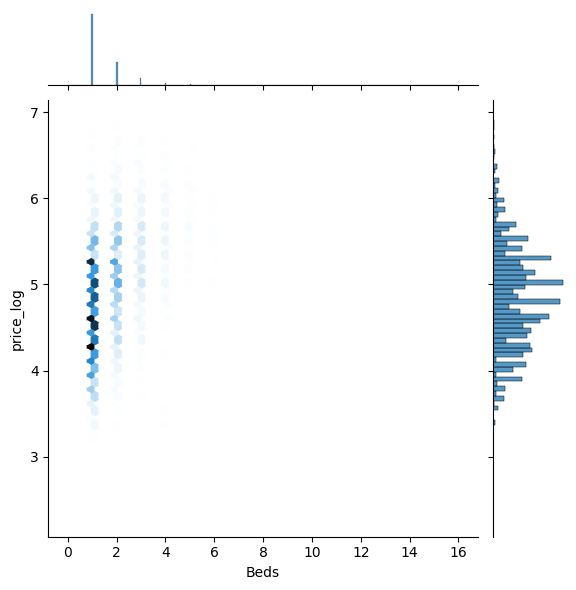

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/airbnb_hw (1).csv")
df.columns = [c.strip() for c in df.columns]
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Beds"] = pd.to_numeric(df["Beds"], errors="coerce")

print(df.shape)
print(df.shape[0])
print(df.columns.tolist())
df.head()

ct = pd.crosstab(df["Property Type"], df["Room Type"])
display(ct)
display(ct.div(ct.sum(axis=1), axis=0))

if "Private room" in ct.columns and "Entire home/apt" in ct.columns:
    display(ct[ct["Private room"] > ct["Entire home/apt"]])

price = df["Price"].dropna()
print(price.describe(percentiles=[0.5,0.9,0.95,0.99]))

plt.hist(price, bins=50)
plt.show()

sns.kdeplot(x=price)
plt.show()

plt.boxplot(price, vert=False)
plt.show()

df_pos = df[df["Price"].notna() & (df["Price"] > 0)].copy()
df_pos["price_log"] = np.log(df_pos["Price"])

price_log = df_pos["price_log"]
print(price_log.describe(percentiles=[0.5,0.9,0.95,0.99]))

plt.hist(price_log, bins=50)
plt.show()

sns.kdeplot(x=price_log)
plt.show()

plt.boxplot(price_log, vert=False)
plt.show()

df_scatter = df_pos[df_pos["Beds"].notna()]

plt.scatter(df_scatter["Beds"], df_scatter["price_log"], alpha=0.25)
plt.show()

display(df_pos.groupby("Beds")["Price"].describe())
display(df_pos.groupby("Beds")["Price"].agg(["count","mean","std","median"]))

sns.scatterplot(data=df_scatter, x="Beds", y="price_log", hue="Room Type", alpha=0.35)
plt.show()

top_props = df_scatter["Property Type"].value_counts().head(10).index
df_topprops = df_scatter[df_scatter["Property Type"].isin(top_props)]

sns.scatterplot(data=df_topprops, x="Beds", y="price_log", hue="Property Type", alpha=0.35)
plt.show()

rt_pt = df_pos.groupby(["Room Type","Property Type"])["Price"].agg(["count","mean","std","median"])
display(rt_pt.sort_values("mean", ascending=False).head(30))

rt_pt_f = rt_pt[rt_pt["count"] >= 30]
display(rt_pt_f.sort_values("mean", ascending=False).head(15))
display(rt_pt_f.sort_values("std", ascending=False).head(15))

sns.jointplot(data=df_scatter, x="Beds", y="price_log", kind="hex")
plt.show()

Data overview

~30k observations, 13 variables

Includes price, beds, room type, property type, neighborhood, reviews, etc.

Room Type × Property Type

Apartments dominate across all room types

Houses more likely to be private rooms than entire homes

Bed & Breakfasts and dorms mostly private/shared rooms

Entire homes mainly apartments, lofts, condos

Price (levels)

Strong right skew

Many high-price outliers

Mean > median → badly scaled

Price (log)

Much more symmetric

Outliers compressed

Distribution easier to interpret

price_log vs Beds

Positive relationship: more beds → higher prices

Large spread at each bed count

Variance increases with beds

Price grouped by Beds

Mean price rises with beds

Standard deviation also rises

More beds = more price uncertainty

price_log vs Beds (Room Type / Property Type)

Entire homes are consistently most expensive

Shared rooms cheapest

Apartments and houses dominate higher prices

Some property types show wide dispersion

Room Type & Property Type (grouped prices)

Highest mean: entire home apartments / houses

Highest std: entire homes with many beds

Median more reliable than mean due to skew and outliers

Hex jointplot (price_log vs Beds)

Data heavily concentrated at 1–3 beds

Most listings clustered in moderate price range

Scatterplots exaggerate sparsity at high bed counts

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

(623, 10)
['Month', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)', 'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)', 'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Active Well Service Rig Count (Number of Rigs)']
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)   

/tmp/ipython-input-1617891588.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")


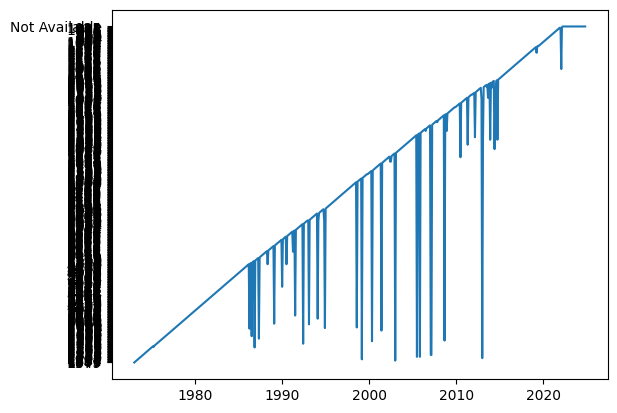

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/drilling_rigs.csv")

print(df.shape)
print(df.columns.tolist())
print(df.dtypes)
df.head()

for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors="ignore")

df["time"] = pd.to_datetime(df["Month"], format="mixed")
df = df.sort_values("time")

plt.plot(df["time"], df["Active Well Service Rig Count (Number of Rigs)"])
plt.show()

df["rig_diff"] = df["Active Well Service Rig Count (Number of Rigs)"].diff()

plt.plot(df["time"], df["rig_diff"])
plt.show()

melted = df.melt(
    id_vars="time",
    value_vars=df.columns[:2],
    var_name="Rig Type",
    value_name="Count"
)

for rig_type in melted["Rig Type"].unique():
    subset = melted[melted["Rig Type"] == rig_type]
    plt.plot(subset["time"], subset["Count"], label=rig_type)

plt.legend()
plt.show()
